<a href="https://colab.research.google.com/github/anandacdr/Data-Scientist-Complete-Notes/blob/master/28_data_accessing_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis Process

1. Asking Questions
2. Data Wrangling<br>
    a. Gathering Data 
        - i. CSV files 
        - ii. APIs 
        - iii. Web Scraping 
        - iv. Databases 
    b. Assessing Data<br>
    c. Cleaning Data
3. Exploratory Data Analysis
4. Drawing Conclusion
5. Comunicating Results

### Summary of today's session

- You have to become Sherlock
- Will try to create a framework
- Frameworks may vary
- The goal is to give you idea

### 1. Data Wrangling

- Data Gathering
- Data Accessing
- Data Cleaning

### 1b. Data Accessing

In this step, the data is to be understood more deeply. Before implementing methods to clean it, you will definitely need to have a better idea about what the data is about.

### Types of Unclean Data
There are 2 kinds of unclean data

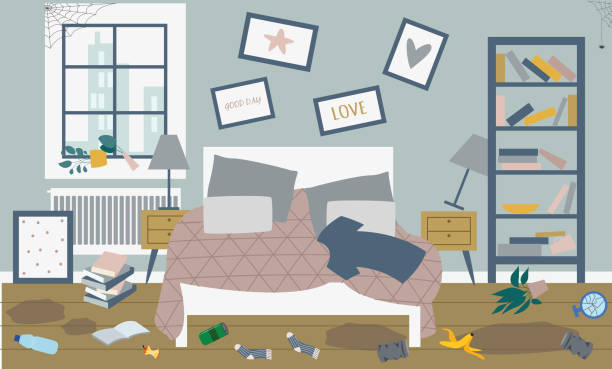

- `Dirty Data (Data with Quality issues)`: Dirty data, also known as low quality data. Low quality data has content issues.
  - Duplicated data
  - Missing Data
  - Corrupt Data
  - Inaccurate Data
- `Messy Data (Data with tidiness issues)`: Messy data, also known as untidy data. Untidy data has structural issues.Tidy data has the following properties:

  - Each variable forms a column
  - Each observation forms a row
  - Each observational unit forms a table

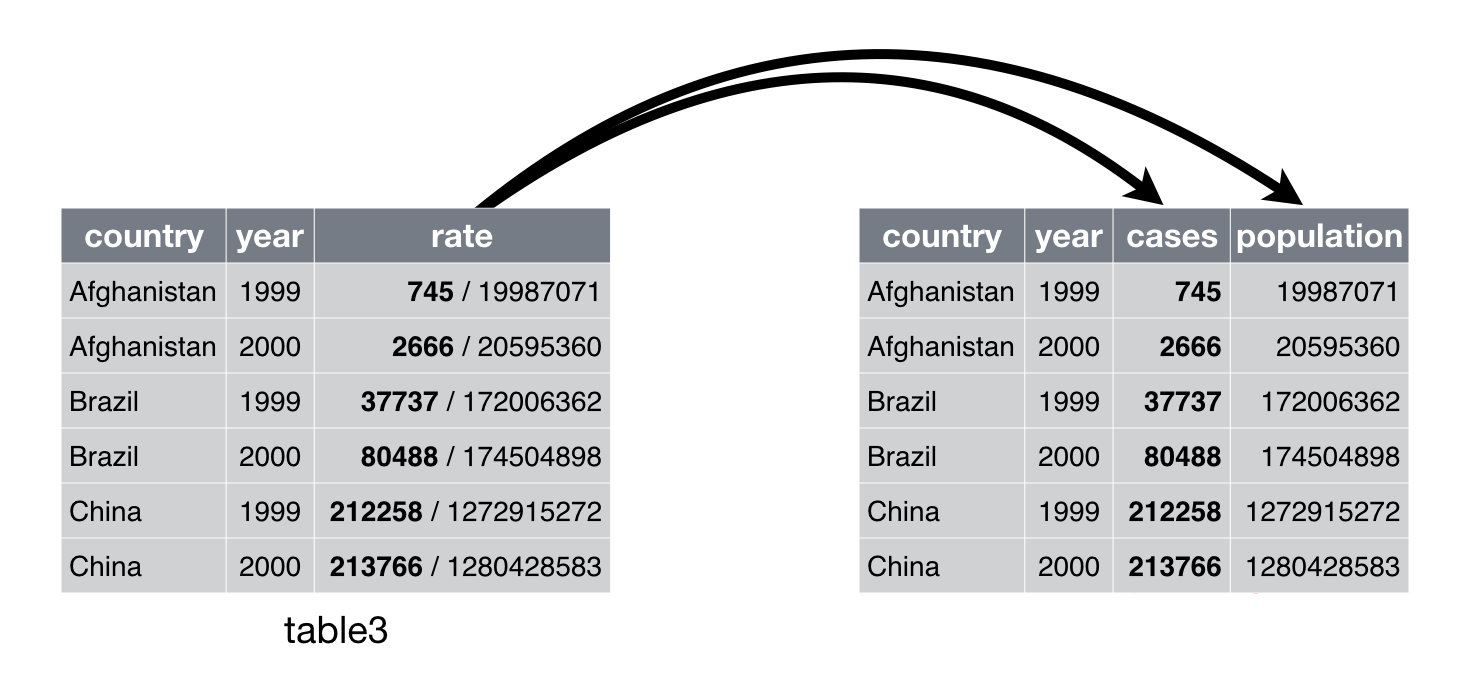

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')
treatments_cut = pd.read_csv('treatments_cut.csv')

In [ ]:
# view datasets
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [ ]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [ ]:
treatments_cut.shape

(70, 7)

In [ ]:
adverse_reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


### 1. Write a summary for your data

This is a dataset about 500 patients of which 350 patients participated in a clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before. All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After 4 weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:

- 175 patients switched to Auralin for 24 weeks
- 175 patients continued using Novodra for 24 weeks

Data about patients feeling some adverse effects is also recorded.

### 2. Write Column descriptions

#### **Table** -> `patients`:

- `patient_id`: the unique identifier for each patient in the Master Patient Index (i.e. patient database) of the pharmaceutical company that is producing Auralin
- `assigned_sex`: the assigned sex of each patient at birth (male or female)
- `given_name`: the given name (i.e. first name) of each patient
- `surname`: the surname (i.e. last name) of each patient
- `address`: the main address for each patient
- `city`: the corresponding city for the main address of each patient
- `state`: the corresponding state for the main address of each patient
- `zip_code`: the corresponding zip code for the main address of each patient
- `country`: the corresponding country for the main address of each patient (all United states for this clinical trial)
- `contact`: phone number and email information for each patient
- `birthdate`: the date of birth of each patient (month/day/year). The inclusion criteria for this clinical trial is age >= 18 (there is no maximum age because diabetes is a growing problem among the elderly population)
- `weight`: the weight of each patient in pounds (lbs)
- `height`: the height of each patient in inches (in)
- `bmi`: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. The inclusion criteria for this clinical trial is 16 >= BMI >= 38.

#### **Table** -> `treatments` and `treatment_cut`:

- `given_name`: the given name of each patient in the Master Patient Index that took part in the clinical trial
- `surname`: the surname of each patient in the Master Patient Index that took part in the clinical trial
- `auralin`: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) and the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the international unit of measurement and the standard measurement for insulin.
- `novodra`: same as above, except for patients that continued treatment with Novodra
- `hba1c_start`: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The HbA1c test measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- `hba1c_end`: the patient's HbA1c level at the end of the last week of treatment
- `hba1c_change`: the change in the patient's HbA1c level from the start of treatment to the end, i.e., hba1c_start - hba1c_end. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

#### **Table** -> `adverse_reactions`

- `given_name`: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- `surname`: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- `adverse_reaction`: the adverse reaction reported by the patient

### 3. Add any additional information

Additional useful information:

- Insulin resistance varies person to person, which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.
- It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This diversity is reflected in the patients table.

### Types of Assessment
There are 2 types of assessment styles

- `Manual` - Looking through the data manually in google sheets
- `Programmatic` - By using pandas functions such as info(), describe() or sample()

### Steps in Assessment
There are 2 steps involved in Assessment

- Discover
- Document

In [ ]:
# export data for manual assessment

with pd.ExcelWriter('clinical_trials.xlsx') as writer:
  patients.to_excel(writer,sheet_name='patients')
  treatments.to_excel(writer,sheet_name='treatments')
  treatment_cut.to_excel(writer,sheet_name='treatment_cut')
  adverse_reactions.to_excel(writer,sheet_name='adverse_reactions')

### Issues with the dataset

1. Dirty Data

  Table - `Patients`

    - patient_id = 9 has misspelled name 'Dsvid' instead of David `accuracy`
    - state col sometimes contain full name and some times abbrivietation `consistency`
    - zip code col has entries with 4 digit `validity`
    - data missing for 12 patients in address,city,	state,zip_code	,country,	contact `completion`
    - incorrect data type assigned to sex, zip code, birthdate `validity`
    - duplicate entries by the name of John Doe `accuracy`
    - one patient has weight = 48 pounds `accuracy`
    - one patient has height = 27 inches `accuracy`

  Table - `Treatments` & `Treatments_cut`

    - given_name and surname col is is all lower case `consistency`
    - remove u from Auralin and Novadra cols `validity`
    - '-' in novadra and Auralin col treated as nan `validity`
    - missing values in hba1c_change col `completion`
    - 1 duplicate entry by the name Joseph day `accuracy`
    - in hba1c_change 9 instead of 4 `accuracy`

  Table - `Adverse_reactions`

    - given_name and surname are all in lower case `consistency`

2. Messy Data

  Table - `Patients`

    - contact col contains both phone and email

  Table - `Treatments` & `Treatments_cut`

    - Auralin and Novadra col should be split into 2 cols start and end dose
    - merge both the tables

  Table - `Adverse_reactions`

    - This table should not exist independently

### Automatic Assessment

- head and tail
- sample
- info
- isnull
- duplicated
- describe

In [ ]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [ ]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [ ]:
treatments[treatments.duplicated()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [ ]:
treatments[treatments.duplicated(subset=['given_name'	,'surname'])]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [ ]:
treatments_cut[treatments_cut.duplicated(subset=['given_name'	,'surname'])]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change


In [ ]:
adverse_reactions.duplicated().sum()

0

In [ ]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [ ]:
patients[patients['height'] == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [ ]:
treatments_cut.describe()

,hba1c_start,hba1c_end,hba1c_change
count,70.000000,70.000000,42.000000
mean,7.838000,7.443143,0.518810
std,0.423007,0.418706,0.270719
min,7.510000,7.020000,0.280000
25%,7.640000,7.232500,0.340000
50%,7.730000,7.345000,0.370000
75%,7.860000,7.467500,0.907500
max,9.910000,9.460000,0.970000


In [ ]:
treatments.sort_values('hba1c_change',na_position='first')

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
9,asia,woźniak,30u - 36u,-,7.76,7.37,NaN
10,joseph,day,29u - 36u,-,7.70,7.19,NaN
...,...,...,...,...,...,...,...
49,jackson,addison,-,42u - 42u,7.99,7.51,0.98
17,gina,cain,-,36u - 36u,7.88,7.40,0.98
32,laura,ehrlichmann,-,43u - 40u,7.95,7.46,0.99
245,wu,sung,-,47u - 48u,7.61,7.12,0.99


### Note - Assessing Data is an Iterative Process

### Data Quality Dimensions

- Completeness -> is data missing?
- Validity -> is data invalid -> negative height -> duplicate patient id
- Accuracy -> data is valid but not accurate -> weight -> 1kg
- Consistency -> both valid and accurate but written differently -> New Youk and NY

### Order of severity

Completeness <- Validity <- Accuracy <- Consistency

### Data Cleaning Order

1. Quality -> Completeness
2. Tidiness
3. Quality -> Validity
4. Quality -> Accuracy
5. Quality -> Consistency

#### Steps involved in Data cleaning
- Define
- Code
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process`

In [ ]:
patients_df = patients.copy()
treatments_df = treatments.copy()
treatments_cut_df = treatments_cut.copy()
adverse_reactions_df = adverse_reactions.copy()

### Define

- replace all missing values of patients df with no data
- sub hba1c_start from hba1c_end to get all the change values
- in patients table we will use regex to separate email and phone

In [ ]:
# code
patients_df.fillna('No data',inplace=True)

In [ ]:
# test
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       503 non-null    object 
 5   city          503 non-null    object 
 6   state         503 non-null    object 
 7   zip_code      503 non-null    object 
 8   country       503 non-null    object 
 9   contact       503 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 55.1+ KB


In [ ]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [ ]:
# code 
treatments_df['hba1c_change'] = treatments_df['hba1c_start'] - treatments_df['hba1c_end']
treatments_cut_df['hba1c_change'] = treatments_cut_df['hba1c_start'] - treatments_cut_df['hba1c_end']

In [ ]:
# test
treatments_cut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    70 non-null     object 
 1   surname       70 non-null     object 
 2   auralin       70 non-null     object 
 3   novodra       70 non-null     object 
 4   hba1c_start   70 non-null     float64
 5   hba1c_end     70 non-null     float64
 6   hba1c_change  70 non-null     float64
dtypes: float64(3), object(4)
memory usage: 4.0+ KB


In [ ]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [ ]:
def find_contact_details(text: str) -> tuple:
    # it the value is NaN, then return it
    if pd.isna(text):
        return np.nan
    
    # create the phone number pattern
    phone_number_pattern = re.compile(r"(\+[\d]{1,3}\s)?(\(?[\d]{3}\)?\s?-?[\d]{3}\s?-?[\d]{4})")
    # find the phone number from the value/text, as a result we will get a list
    phone_number  = re.findall(phone_number_pattern, text)

    # if length is 0, then the regex can't find any ph number, then define with NaN
    if len(phone_number) <= 0:
        phone_number = np.nan
    # if the country code is attached with the ph number, for that case, the first
    # element will be the country code and the 2nd element will be the actual ph
    # number. So, get that ph number
    elif len(phone_number) >= 2:
        phone_number = phone_number[1]
    # else, we will get the ph number. Grab it.
    else:
        phone_number = phone_number[0]

    # if we found the ph number (with/without country code), then remove that part from the actual value.
    # after removing the ph number, the remaining string might be the email address.
    possible_email_add = re.sub(phone_number_pattern, "", text).strip()

    # then return the ph number and the email address
    return phone_number, possible_email_add

In [ ]:
patients_df['phone'] = patients_df["contact"].apply(lambda x: find_contact_details(x)).apply(lambda x:x[0])
patients_df['email'] = patients_df["contact"].apply(lambda x: find_contact_details(x)).apply(lambda x:x[1])

In [ ]:
patients_df.drop(columns='contact',inplace=True)

In [ ]:

import re

df = pd.DataFrame(columns=['phone', 'email'])

# Iterate through the data
for item in patients['contact']:
    # Use regular expressions to find the phone numbers and email addresses
    phone_match = re.search(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})', item)
    email_match = re.search(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', item)
    phone = phone_match.group(0) if phone_match else None
    email = email_match.group(1) if email_match else None
    df = df.append({'phone': phone, 'email': email}, ignore_index=True)

print(df)




              phone                                        email
0      951-719-9170         951-719-9170ZoeWellish@superrito.com
1    (217) 569-3204                         PamelaSHill@cuvox.de
2      402-363-6804             402-363-6804JaeMDebord@gustr.com
3    (732) 636-8246                    PhanBaLiem@jourrapide.com
4      334-515-7487              334-515-7487TimNeudorf@cuvox.de
..              ...                                          ...
498    207-477-0579  207-477-0579MustafaLindstrom@jourrapide.com
499    928-284-4492           928-284-4492RumanBisliev@gustr.com
500    816-223-6007        816-223-6007JinkedeKeizer@teleworm.us
501    360 443 2060           ChidaluOnyekaozulu@jourrapide.com1
502    402-848-4923         PatrickGersten@rhyta.com402-848-4923

[503 rows x 2 columns]


In [ ]:
treatments_df = pd.concat([treatments_df,treatments_cut_df])

In [ ]:
treatments_df = treatments_df.melt(id_vars=['given_name', 'surname' ,'hba1c_start', 'hba1c_end','hba1c_change'],var_name='type',value_name='dosage_range')

In [ ]:
treatments_df = treatments_df[treatments_df['dosage_range'] != '-']

In [ ]:
treatments_df['dosage_start'] = treatments_df['dosage_range'].str.split('-').str.get(0)
treatments_df['dosage_end'] = treatments_df['dosage_range'].str.split('-').str.get(1)

<ipython-input-171-19cff1a047dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_start'] = treatments_df['dosage_range'].str.split('-').str.get(0)
<ipython-input-171-19cff1a047dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_end'] = treatments_df['dosage_range'].str.split('-').str.get(1)


In [ ]:
treatments_df.drop(columns='dosage_range',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
treatments_df['dosage_start'] = treatments_df['dosage_start'].str.replace('u','')
treatments_df['dosage_end'] = treatments_df['dosage_end'].str.replace('u','')

<ipython-input-176-71418162ebe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_start'] = treatments_df['dosage_start'].str.replace('u','')
<ipython-input-176-71418162ebe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_end'] = treatments_df['dosage_end'].str.replace('u','')


In [ ]:
treatments_df['dosage_start'] = treatments_df['dosage_start'].astype('int')
treatments_df['dosage_end'] = treatments_df['dosage_end'].astype('int')

<ipython-input-179-c144854612b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_start'] = treatments_df['dosage_start'].astype('int')
<ipython-input-179-c144854612b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_end'] = treatments_df['dosage_end'].astype('int')


In [ ]:
treatments_df

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,type,dosage_start,dosage_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48
3,skye,gormanston,7.97,7.62,0.35,auralin,33,36
6,sophia,haugen,7.65,7.27,0.38,auralin,37,42
7,eddie,archer,7.89,7.55,0.34,auralin,31,38
9,asia,woźniak,7.76,7.37,0.39,auralin,30,36
...,...,...,...,...,...,...,...,...
688,christopher,woodward,7.51,7.06,0.45,novodra,55,51
690,maret,sultygov,7.67,7.30,0.37,novodra,26,23
694,lixue,hsueh,9.21,8.80,0.41,novodra,22,23
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28,26


In [ ]:
treatments_df = treatments_df.merge(adverse_reactions_df, how ='left', on=['given_name','surname'])

In [ ]:
treatments_df

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,type,dosage_start,dosage_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33,36,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37,42,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31,38,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30,36,NaN
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55,51,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26,23,NaN
347,lixue,hsueh,9.21,8.80,0.41,novodra,22,23,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28,26,hypoglycemia
